<a href="https://www.kaggle.com/code/abdelrahmanhanafy/titanic?scriptVersionId=99436740" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic Comp

#### Refrances 
- https://www.kaggle.com/code/startupsci/titanic-data-science-solutions


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Data Exploration

In [2]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train = train.drop(['Name','Ticket','Cabin'], axis=1)
test = test.drop(['Name','Ticket','Cabin'], axis=1)

In [6]:
train.dropna(subset=['Embarked'], inplace=True)

In [7]:
train.describe(include=np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.describe(include=['O'])

,Sex,Embarked
count,889,889
unique,2,3
top,male,S
freq,577,644


## Feature Engineering

In [9]:
fam = train.SibSp + train.Parch
train["Family"] = fam

In [10]:
fam = test.SibSp + test.Parch
test["Family"] = fam


In [11]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,1
4,5,0,3,male,35.0,0,0,8.0500,S,0


In [12]:
data = [train,test]
for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Family'] == 0, 'IsAlone'] = 1

In [13]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,IsAlone
0,1,0,3,male,22.0,1,0,7.2500,S,1,0
1,2,1,1,female,38.0,1,0,71.2833,C,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,1


In [14]:
train.Family.value_counts()

0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [15]:
train.IsAlone.value_counts()

1    535
0    354
Name: IsAlone, dtype: int64

# EDA

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


def barplot_it(col):
    sns.barplot(train[col].unique(),train[col].value_counts()).set_title(col)
    plt.show()




<AxesSubplot:ylabel='Survived'>

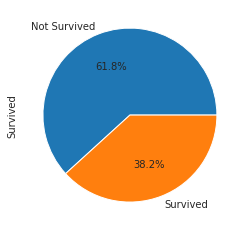

In [17]:
train.Survived.value_counts().plot.pie(labels=["Not Survived","Survived"],autopct='%1.1f%%')

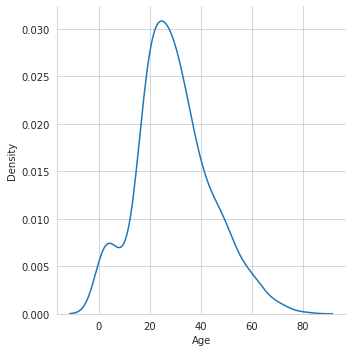

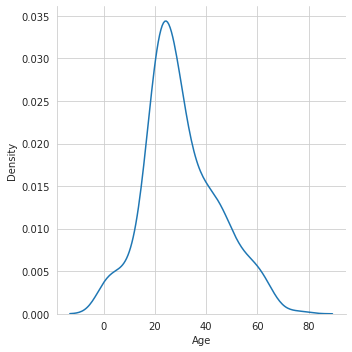

In [18]:
sns.displot(train, x="Age",kind="kde")
sns.displot(test, x="Age",kind="kde")

plt.show()

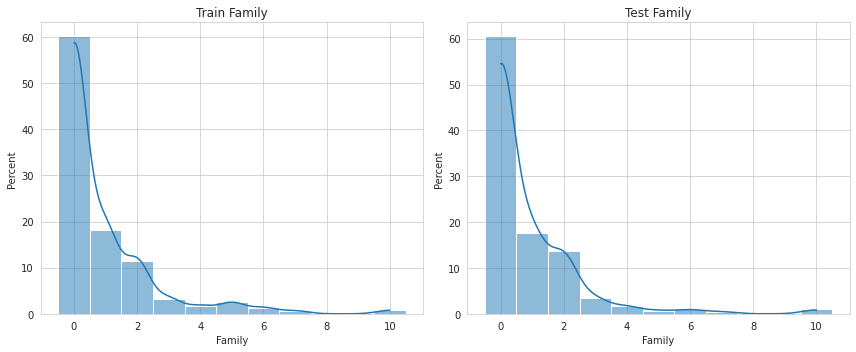

In [19]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(data=train, x="Family", ax= axes[0], kde=True, discrete = True,stat="percent")
sns.histplot(data=test, x="Family", ax= axes[1],  kde=True,  discrete = True,stat="percent")

axes[0].set_title('Train Family')
axes[1].set_title('Test Family')

plt.tight_layout()

Text(0.5, 1.0, 'Train Fare Data')

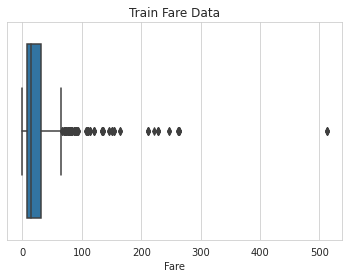

In [20]:
sns.boxplot(data=train, x="Fare")
plt.title("Train Fare Data")

Text(0.5, 1.0, 'Test Fare Data')

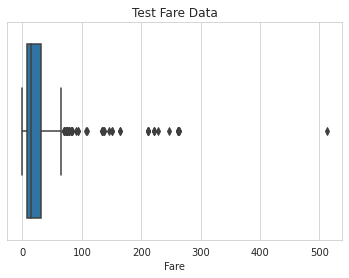

In [21]:
sns.boxplot(data=test, x="Fare")
plt.title("Test Fare Data")


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


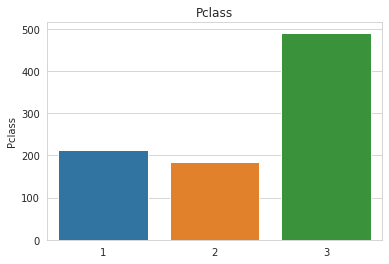

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


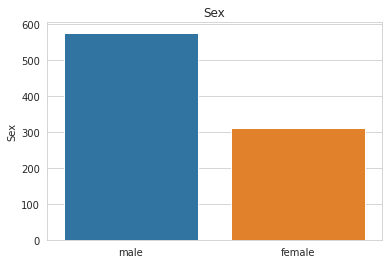

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


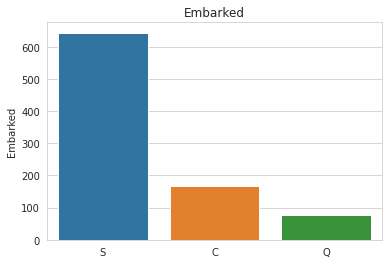

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


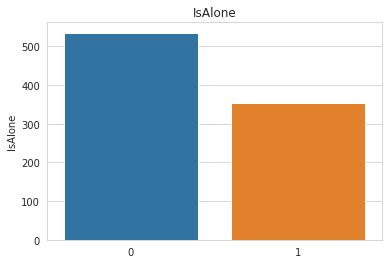

In [22]:
features = ["Pclass","Sex","Embarked","IsAlone"]
for col in features:
    barplot_it(col)

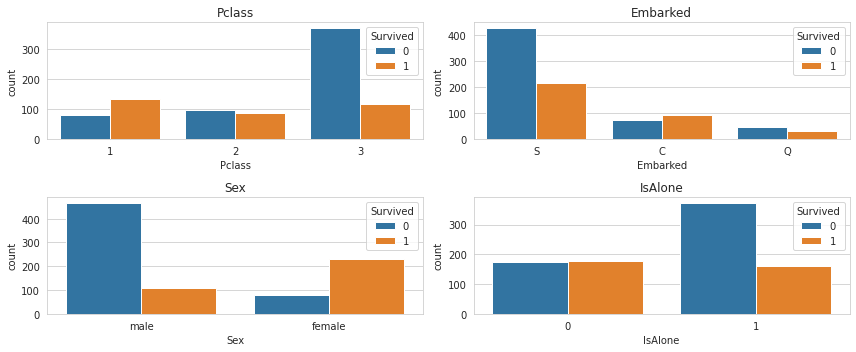

In [23]:
fig, axes = plt.subplots(2,2, figsize=(12,5))

sns.countplot(data=train, x="Pclass", hue="Survived", ax= axes[0][0])
sns.countplot(data=train, x="Embarked", hue="Survived", ax= axes[0][1])
sns.countplot(data=train, x="Sex", hue="Survived", ax= axes[1][0])
sns.countplot(data=train, x="IsAlone", hue="Survived", ax= axes[1][1])

axes[0][0].set_title('Pclass')
axes[0][1].set_title('Embarked')
axes[1][0].set_title('Sex')
axes[1][1].set_title('IsAlone')

plt.tight_layout()


# Data Wrangling

In [24]:
mean_fare = (train.Fare.mean()+test.Fare.mean())/2
train.Fare.fillna(mean_fare, inplace=True)
test.Fare.fillna(mean_fare, inplace=True)

In [25]:
mean_Age = (train.Age.mean()+test.Age.mean())/2
train.Age.fillna(mean_Age, inplace=True)
test.Age.fillna(mean_Age, inplace=True)

In [26]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
 9   Family       889 non-null    int64  
 10  IsAlone      889 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 115.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [27]:
AgeBand = pd.cut(train.Age, 8)
AgeBand.value_counts()

(20.315, 30.263]    407
(30.263, 40.21]     154
(10.368, 20.315]    115
(40.21, 50.158]      86
(0.34, 10.368]       64
(50.158, 60.105]     42
(60.105, 70.052]     16
(70.052, 80.0]        5
Name: Age, dtype: int64

In [28]:
data = [test,train]

In [29]:
for dataset in data:
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 70), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 70) & (dataset['Age'] <= 80), 'Age'] = 7

In [30]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
 9   Family       889 non-null    int64  
 10  IsAlone      889 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 115.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [31]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,IsAlone
0,892,3,male,3.0,0,0,7.8292,Q,0,1
1,893,3,female,4.0,1,0,7.0000,S,1,0
2,894,2,male,6.0,0,0,9.6875,Q,0,1
3,895,3,male,2.0,0,0,8.6625,S,0,1
4,896,3,female,2.0,1,1,12.2875,S,2,0


In [32]:
FareBand = pd.cut(train.Fare, 20)
FareBand.value_counts()

(-0.512, 25.616]      562
(25.616, 51.233]      170
(51.233, 76.849]       67
(76.849, 102.466]      37
(128.082, 153.699]     16
(102.466, 128.082]     15
(204.932, 230.548]      9
(256.165, 281.781]      6
(486.713, 512.329]      3
(230.548, 256.165]      2
(153.699, 179.315]      2
(179.315, 204.932]      0
(281.781, 307.398]      0
(307.398, 333.014]      0
(333.014, 358.63]       0
(358.63, 384.247]       0
(384.247, 409.863]      0
(409.863, 435.48]       0
(435.48, 461.096]       0
(461.096, 486.713]      0
Name: Fare, dtype: int64

In [33]:
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 25, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 25) & (dataset['Fare'] <= 50), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 50), 'Fare'] = 2

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,IsAlone
0,1,0,3,male,2.0,1,0,0.0,S,1,0
1,2,1,1,female,3.0,1,0,2.0,C,1,0
2,3,1,3,female,2.0,0,0,0.0,S,0,1
3,4,1,1,female,3.0,1,0,2.0,S,1,0
4,5,0,3,male,3.0,0,0,0.0,S,0,1


In [35]:
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [36]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
 9   Family       889 non-null    int64  
 10  IsAlone      889 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 115.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [37]:
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})

In [38]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,IsAlone
0,892,3,0,3.0,0,0,0.0,2,0,1
1,893,3,1,4.0,1,0,0.0,0,1,0
2,894,2,0,6.0,0,0,0.0,2,0,1
3,895,3,0,2.0,0,0,0.0,0,0,1
4,896,3,1,2.0,1,1,0.0,0,2,0


In [39]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
 9   Family       889 non-null    int64  
 10  IsAlone      889 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 115.6 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non

In [40]:
train.Age  = train.Age.astype(int)
train.Fare  = train.Fare.astype(int)

In [41]:
test.Age  = test.Age.astype(int)
test.Fare  = test.Fare.astype(int)

In [42]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  889 non-null    int64
 1   Survived     889 non-null    int64
 2   Pclass       889 non-null    int64
 3   Sex          889 non-null    int64
 4   Age          889 non-null    int64
 5   SibSp        889 non-null    int64
 6   Parch        889 non-null    int64
 7   Fare         889 non-null    int64
 8   Embarked     889 non-null    int64
 9   Family       889 non-null    int64
 10  IsAlone      889 non-null    int64
dtypes: int64(11)
memory usage: 115.6 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-nu

# Models

In [43]:
#importing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

## Data preparation

In [44]:
y = train["Survived"]
features = ["Pclass","Sex",'SibSp','Parch']

X=pd.get_dummies(train[features])
X_test=pd.get_dummies(test[features])

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,ConfusionMatrixDisplay

def matrix_it(model,X,y):
    model.fit(X,y)
    pred_ = model.predict(X)
    #creating confusion matrix to know the errors
    conf = confusion_matrix(y, pred_ ,normalize="all")
    disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)
    print(model.score(X, y))
    

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
SX = scaler.transform(X)
SX_test = scaler.transform(X_test)

## 1-SVC

0.8042744656917885


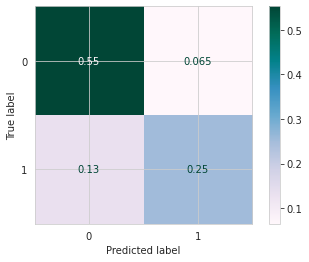

In [47]:
svc = SVC()
matrix_it(svc,X,y)

#### using bangging

0.8087739032620922


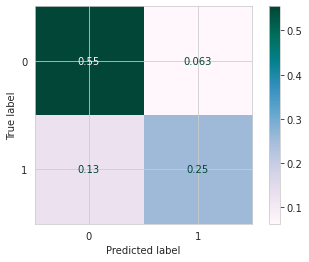

In [48]:
#bX, by = make_classification(n_samples=889, n_features=4,
#                               n_informative=2, n_redundant=0,
#                               random_state=0, shuffle=True)

bsvm = BaggingClassifier(base_estimator=svc,
                            n_estimators=100, random_state=0)
matrix_it(bsvm,SX,y)

## 2-Random Forest

0.8166479190101237


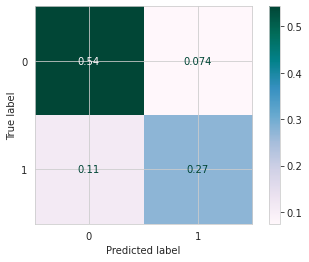

In [49]:
rf = RandomForestClassifier(n_estimators=250, max_depth=7, random_state=1)
matrix_it(rf,X,y)

## 3-KNN

0.8087739032620922


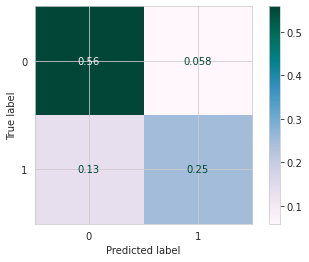

In [50]:
KNN = KNeighborsClassifier()
matrix_it(KNN,X,y)

## 4-Decision Tree 

0.8166479190101237


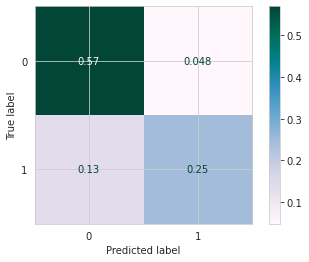

In [51]:
Decision_Tree = DecisionTreeClassifier() 
matrix_it(Decision_Tree,X,y)

## OUTPUT

In [52]:
bX_test, by_test = make_classification(n_samples=418, n_features=3,
                               n_informative=2, n_redundant=0,
                               random_state=0, shuffle=True)


predictions = rf.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission_best_Res.csv', index=False)
print("Your submission of was successfully saved!")

Your submission of was successfully saved!
